In [1]:
import numpy as np
from numpy import pi, sqrt, exp, arcsin, arctan, arccos
import numpy.ma as ma
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt

# mpl.use('pgf')
if mpl.get_backend() == 'pgf':
    pass
else:
    %matplotlib inline 
    %config InlineBackend.figure_format = 'retina'
    
FIGURE_PATH='figures/'

from scipy.constants import h, m_e, k, N_A, pi, e, hbar, u, k, mu_0

from scipy.optimize import curve_fit
import scipy.integrate as integrate
from scipy.stats import chi2
from scipy.special import gamma

In [2]:
def sf(x):
    # calculate significant figures
    # return: decimal place to be rounded to
    if isinstance(x, float) or isinstance(x,int):
        if x == 0:
            return 20 
        else:
            return int(-1 * np.floor(np.log10(x)) + 1)
    else:
        return (-1 * np.floor(np.log10(np.min(ma.masked_where(x==0,x)))) + 1).astype(int)

In [3]:
def cm2inch(lst):
    inch = 2.54
    if isinstance(lst, list):
        return [x/inch for x in lst] 
    elif isinstance(lst, float):
        return lst/inch

default_width =  cm2inch(21/sqrt(2)) # 5.78853 # approx 14.7cm
default_ratio = (sqrt(5.0) - 1.0) / 2.0 # golden mean
print(default_width)

5.846158427132873


In [4]:
default_width = cm2inch(21/sqrt(2))
default_ratio = default_ratio = (sqrt(5.0) - 1.0) / 2.0 # golden mean

In [5]:
from matplotlib import rcParams
if mpl.get_backend() == 'pgf':
    rcParams.update({'legend.loc' : 'best'})
    rcParams.update({
        "text.usetex": True,
        "pgf.texsystem": "xelatex",
        "pgf.rcfonts": False,
        "font.family": "serif",
        "font.serif": [],
        "font.sans-serif": [],
        "font.monospace": [],
        "figure.figsize": [default_width, default_width * default_ratio],
        "pgf.preamble": [
            r"\usepackage[utf8x]{inputenc}",
            r"\usepackage[T1]{fontenc}",
        ],
    })
    rcParams.update({'savefig.bbox' : 'standard'})
    rcParams.update({'savefig.pad_inches' : 0.0})
else:
    rcParams.update({'figure.autolayout': True})
    rcParams.update({'figure.figsize' : [15,9.47]})
    rcParams.update({'font.size' : 16})
rcParams.update({'errorbar.capsize' : 4})
rcParams.update({'legend.loc' : 'best'})

###### Fit function to data
```
def fit_function(x, param1, param2, param3):
    return param1*x**param3 + param2 

popt, pcov = curve_fit(fit_function, x, y, sigma = error_array)

param1 = popt[0]
param1_err = pcov[0][0]
```

###### Plot data

```
# initiate figure
plt.clf()
plt.figure(figsize=(default_width, default_width*default_ratio))

# plots
plt.errorbar(x, y, linestyle='none', marker='.', yerr=error_array)
plt.plot(x,fit_function(x, *popt))

# options
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('title')
# plt.xticks(x)
# plt.yscale('log') # set y scale to logarithmic
plt.legend()

# save and show
filename='filename'
if mpl.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+filename+'.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+filename+'.pdf', format='pdf')
    plt.clf()
plt.savefig(FIGURE_PATH+filename+'.jpg', format='jpg')
plt.show()
```

###### Load .txt data into arrays
```
data1, data2 = np.loadtxt('data/dataset.txt', skiprows=1, usecols=(0,1), unpack=True)
```

###### Significant Figures
```
print(f"val: {round(val,sf(val_err))} +/- {round(val_err,sf(val_err))}")
```

### Messung des Zählrohrplateaus

$V_{E} = (450 \pm 10) \text{V}$ 

In [6]:
### Daten Messung Zaehlrohrplateau
U = np.arange(450,800,25)
N = np.array([1956, 2052, 2040, 2092, 2180, 2109, 2124, 2144, 2150, 2231, 2184, 2176, 2237, 2374])
N_err = np.sqrt(N)

0.6015384652442916
0.11311749011858518
0.0280260192133518


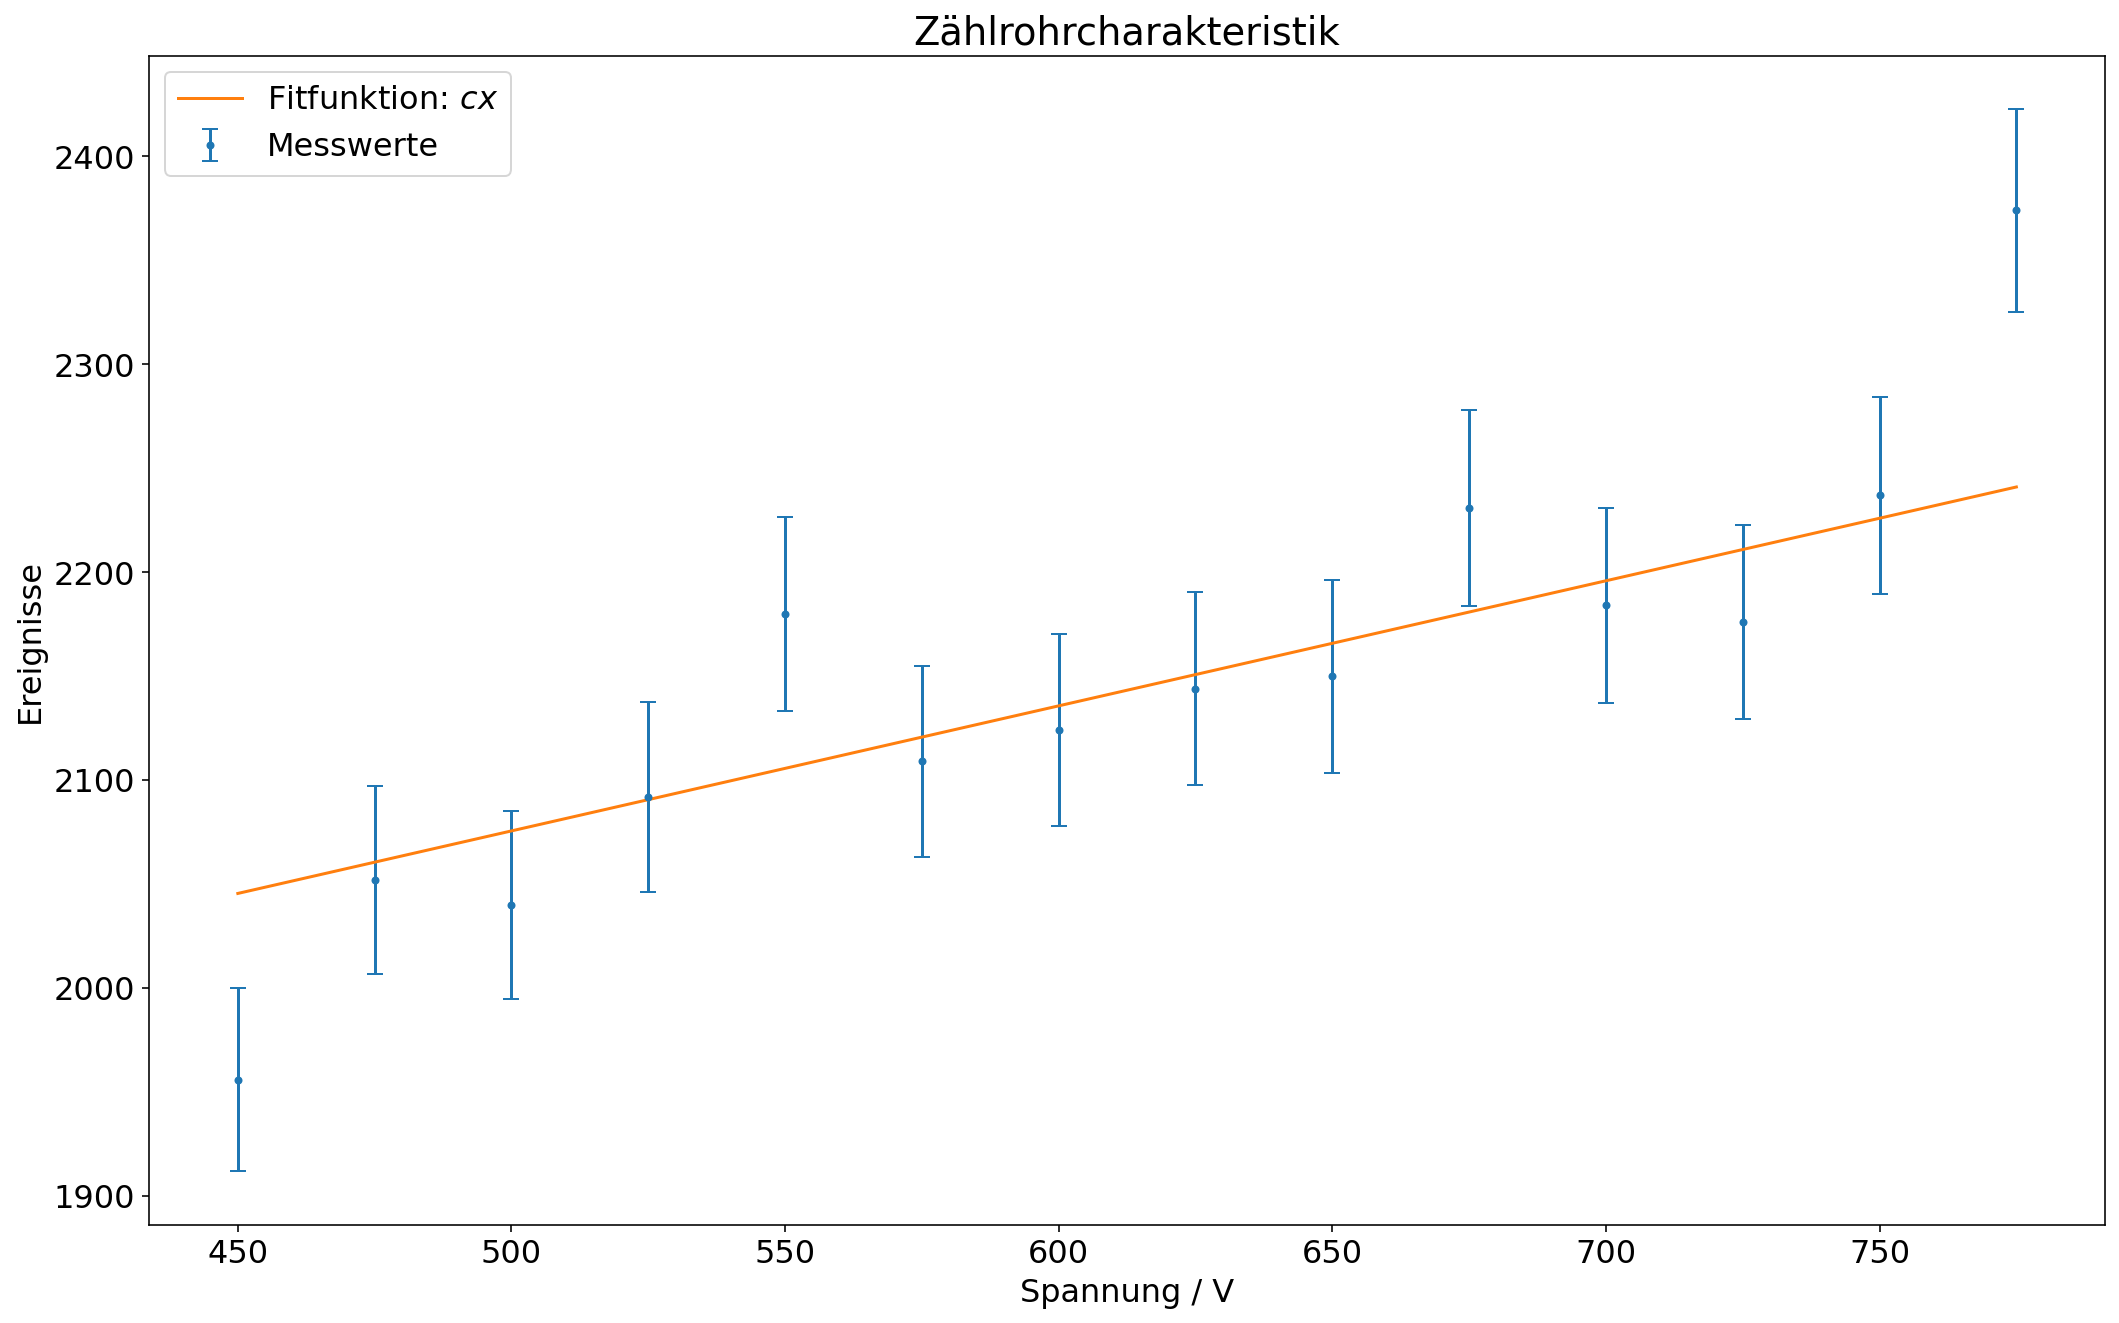

In [7]:
# Fit Funktion
def linear(x, a, b):
    return a * x + b 

popt, pcov = curve_fit(linear, U[1:-1], N[1:-1])
print(popt[0])
print(sqrt(pcov[0][0]))

mean = np.mean(N)
rel_change = 100*popt[0]/mean
print(rel_change)

# initiate figure
if mpl.get_backend() == 'pgf':
    plt.clf()
    plt.figure(figsize=(default_width, default_width*default_ratio))

# plots
plt.errorbar(U, N, linestyle='none', marker='.', yerr=N_err, label='Messwerte')
plt.plot(U,linear(U, *popt), label='Fitfunktion: $cx$')

# options
plt.xlabel('Spannung / V')
plt.ylabel('Ereignisse')
plt.title('Zählrohrcharakteristik')
# plt.xticks(x)
# plt.yscale('log') # set y scale to logarithmic
plt.legend()

# save and show
filename='zaehlrohrcharakteristik'
if mpl.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+filename+'.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+filename+'.pdf', format='pdf')
    plt.clf()
else:
    plt.savefig(FIGURE_PATH+filename+'.jpg', format='jpg')
plt.show()

In [8]:
UE = 450 # V;
UE_err = 10 # V;
U0 = 625 # V;
U0_err = 10 # V;
U_err = 10 # V;

### Untersuchung des Plateauanstiegs

In [9]:
# t = 1min
print('t = 1min')
U_err = 10 # V;
N = [15858, 16071]
N_err = sqrt(N)

pa = N[1] - N[0] # ; Plateauanstieg
pa_rel = pa/N[0]
pa_err = sqrt(N[1] + N[0])
pa_rel_err = pa_rel * sqrt((pa_err / pa)**2 + 1/N[0]) 
print(f"Plateauanstieg: {round(pa,sf(pa_err))} +/- {round(pa_err,sf(pa_err))}")
print(f"Prozentualer Anstieg: {round(pa_rel,sf(pa_rel_err))} +/- {round(pa_rel_err,sf(pa_rel_err))}")

# Signifikanz der Anstiege
abweichung = pa / pa_err
print(abweichung)

# Prozentualer Fehler Plateauanstieg
pa_err_rel1 = pa_err/pa

### Abweichungen bei Vertrauensniveau 68% und 95%
# 1 sigma
var_rel = 1 / sqrt(N[0])
print(f'Prozentuale Variation 1 sigma: {var_rel*100:.2f}%')

# 2 sigma
var_rel = 1 / sqrt(N[0]) * 2
print(f'Prozentuale Variation 2 sigma: {var_rel*100:.2f}%')

t = 1min
Plateauanstieg: 210 +/- 180.0
Prozentualer Anstieg: 0.013 +/- 0.011
1.1920293399054152
Prozentuale Variation 1 sigma: 0.79%
Prozentuale Variation 2 sigma: 1.59%


In [10]:
# t = 3min
print('t = 3min')
U_err = 10 # V;
N = [48042, 48457]
pa = N[1] - N[0] # ; Plateauanstieg
pa_rel = pa/N[0]
pa_err = sqrt(N[1] + N[0])
pa_rel_err = pa_rel * sqrt((pa_err / pa)**2 + 1/N[0]) 
print(f"Plateauanstieg: {round(pa,sf(pa_err))} +/- {round(pa_err,sf(pa_err))}")
print(f"Prozentualer Anstieg: {round(pa_rel,sf(pa_rel_err))} +/- {round(pa_rel_err,sf(pa_rel_err))}")

# Signifikanz der Anstiege
abweichung = pa / pa_err
print(abweichung)

# Prozentualer Fehler Plateauanstieg
pa_err_rel3 = pa_err/pa

### Abweichungen bei Vertrauensniveau 68% und 95%
# 1 sigma
var_rel = 1 / sqrt(N[0])
print(f'Prozentuale Variation 1 sigma: {var_rel*100:.2f}%')

# 2 sigma
var_rel = 1 / sqrt(N[0]) * 2
print(f'Prozentuale Variation 2 sigma: {var_rel*100:.2f}%')

t = 3min
Plateauanstieg: 420 +/- 310.0
Prozentualer Anstieg: 0.0086 +/- 0.0065
1.3359391904404245
Prozentuale Variation 1 sigma: 0.46%
Prozentuale Variation 2 sigma: 0.91%


### Zeit bis Plateauanstieg auf 1% bekannt
$$ 
\frac{\Delta pa}{pa}(t) = \Delta_{\%}pa(t) 
$$
$$
\Delta_{\%}pa(t) = \frac{\Delta_{\%}pa(t_1)-\Delta_{\%}pa(t_0)}{t_1 - t_0} t + 1
$$
Falls $\Delta_{\%}pa(t) = 1\%$, dann 
$$
t = (1\%-1) \frac{t_1 - t_0}{\Delta_{\%}pa(t_1)-\Delta_{\%}pa(t_0)}
$$

In [11]:
t = (0.01 - 1) * (3 - 1) / (pa_err_rel3 - pa_err_rel1) # min;
print(f'{t:.2f} min')

21.91 min


### Auswertung der Daten mit hoher mittlerer Ereigniszahl

In [12]:
anzahl, haeufigkeit = np.loadtxt('data/Gauss/Gauss.dat', unpack=True)
haeufigkeit_err = sqrt(haeufigkeit)

In [13]:
def gaussian(x, A, mu, sig):
    return A/(sqrt(2*pi)*sig)*exp(-(x-mu)**2/2/sig**2)

i, j = 14, -17
p0 = [3000, 75, 8]
popt_g, pcov_g = curve_fit(gaussian, anzahl[i:j],
                           haeufigkeit[i:j], p0=p0, sigma=haeufigkeit_err[i:j])

print(f'A = {popt_g[0]} +/- {np.sqrt(pcov_g[0][0])}')
print(f'mu = {popt_g[1]} +/- {np.sqrt(pcov_g[1][1])}')
print(f'sig = {popt_g[2]} +/- {np.sqrt(pcov_g[2][2])}')

A = 3885.9362650371563 +/- 82.19572204782703
mu = 74.04944377740544 +/- 0.2198556379815431
sig = 8.622430756372362 +/- 0.19795566183430072


In [14]:
def poisson(x, A_p, mu_p):
    return A_p*exp(-mu_p)*mu_p**x/gamma(x+1)

i, j = 14, -17
p0 = [2000, 75]
popt_p, pcov_p = curve_fit(poisson, anzahl[i:j],
                           haeufigkeit[i:j], p0=p0, sigma=haeufigkeit_err[i:j])

print(f'A = {popt_p[0]} +/- {np.sqrt(pcov_p[0][0])}')
print(f'mu = {popt_p[1]} +/- {np.sqrt(pcov_p[1][1])}')

A = 3870.6479710852977 +/- 73.3054161575638
mu = 74.23629644435702 +/- 0.1879239557866285


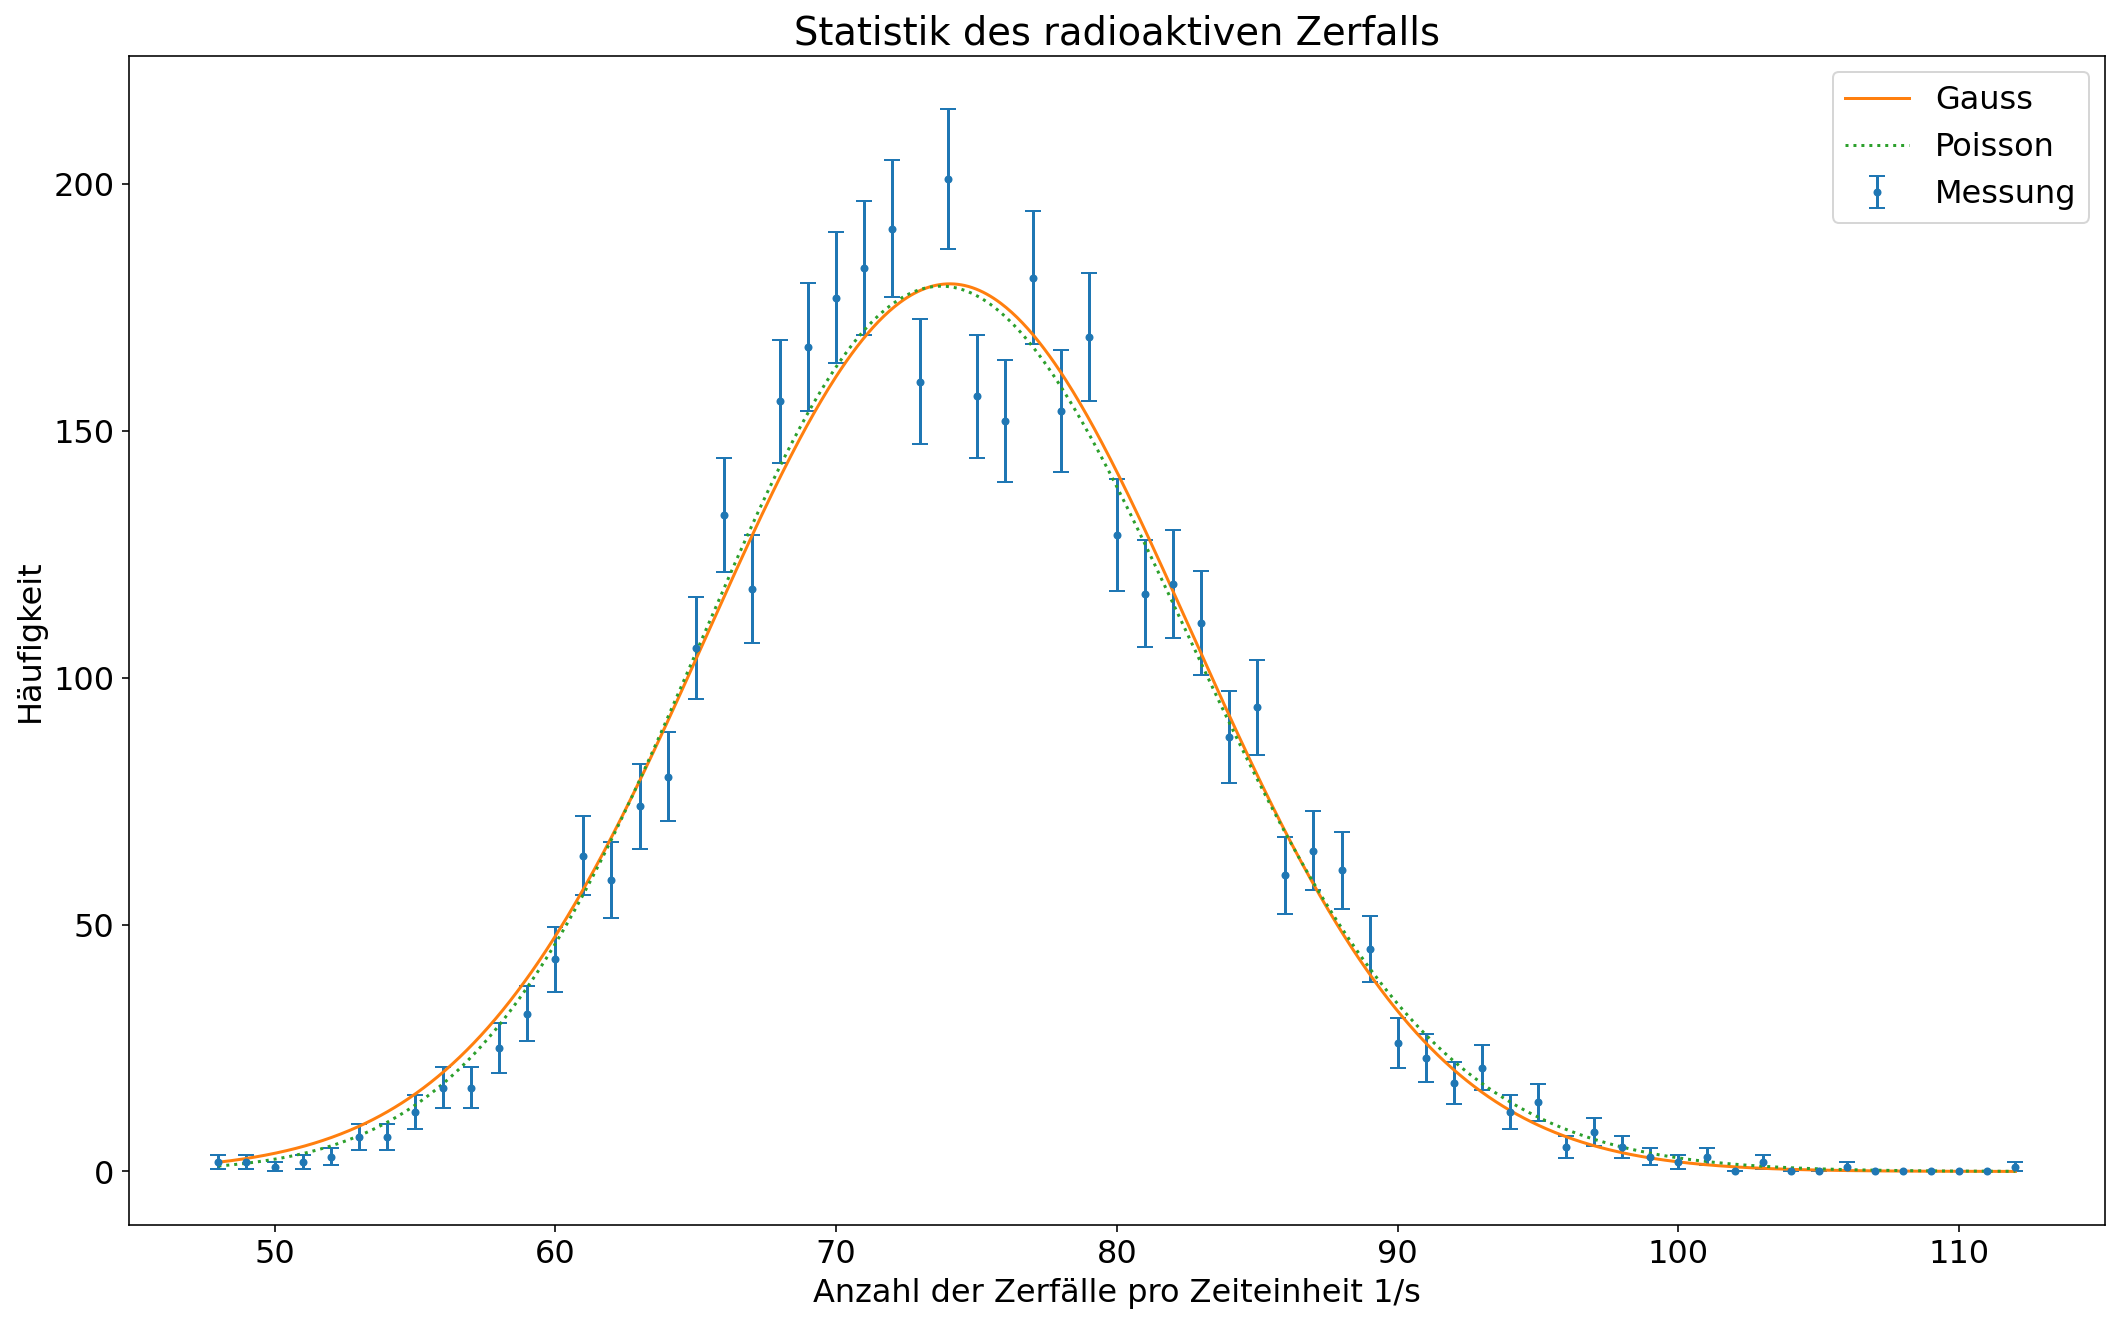

In [15]:
# initiate figure
if mpl.get_backend() == 'pgf':
    plt.clf()
    plt.figure(figsize=(default_width, default_width*default_ratio))

# plots
plt.errorbar(anzahl,haeufigkeit, linestyle='none', marker='.', yerr=haeufigkeit_err, label='Messung')
x = np.linspace(np.min(anzahl), np.max(anzahl),1000)
plt.plot(x, gaussian(x, *popt_g), label='Gauss')
plt.plot(x, poisson(x, *popt_p), label='Poisson', linestyle=':')

# options
plt.xlabel('Anzahl der Zerfälle pro Zeiteinheit 1/s')
plt.ylabel('Häufigkeit')
plt.title('Statistik des radioaktiven Zerfalls')
plt.legend()

# save and show
filename='verteilung_hohe_mittlere_verteilungszahl'
if mpl.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+filename+'.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+filename+'.pdf', format='pdf')
    plt.clf()
else:
    plt.savefig(FIGURE_PATH+filename+'.jpg', format='jpg')
plt.show()

#### Güte des Fits $\chi^2$

In [16]:
# Gauss:
chi2_g=np.sum((gaussian(anzahl[i:j],*popt_g) - haeufigkeit[i:j])**2 / haeufigkeit_err[i:j]**2)
dof_g=len(anzahl[i:j])-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g=chi2_g/dof_g
print("chi2_g=", chi2_g)
print("chi2_red_g=",chi2_red_g)

# Poisson:
chi2_p=np.sum((poisson(anzahl[i:j],*popt_p) - haeufigkeit[i:j])**2 / haeufigkeit_err[i:j]**2)
dof_p=len(anzahl[i:j])-2 #poisson hat nur 2 Pa
chi2_red_p=chi2_p/dof_p
print("chi2_p=", chi2_p)
print("chi2_red_p=",chi2_red_p)

chi2_g= 42.2974326657957
chi2_red_g= 1.3644333117998613
chi2_p= 40.452942593089006
chi2_red_p= 1.2641544560340314


In [17]:
# Gauss:
prob_g = round(1-chi2.cdf(chi2_g,dof_g),2)*100
# Poisson:
prob_p = round(1-chi2.cdf(chi2_p,dof_p),2)*100

print(f'Wahrscheinlichkeit Gauss   = {prob_g}%')
print(f'Wahrscheinlichkeit Poisson = {prob_p}%')

Wahrscheinlichkeit Gauss   = 8.0%
Wahrscheinlichkeit Poisson = 15.0%


### Auswertung der Daten mit kleiner mittlerer Ereigniszahl

In [18]:
anzahl, haeufigkeit = np.loadtxt('data/Poisson/Poisson.dat', unpack=True)
haeufigkeit_err = sqrt(haeufigkeit)

In [19]:
def gaussian(x, A, mu, sig):
    return A/(sqrt(2*pi)*sig)*exp(-(x-mu)**2/2/sig**2)

p0 = [500, 4, 4]
popt_g, pcov_g = curve_fit(gaussian, anzahl[:-3],
                           haeufigkeit[:-3], p0=p0, sigma=haeufigkeit_err[:-3])

print(f'A = {popt_g[0]} +/- {np.sqrt(pcov_g[0][0])}')
print(f'mu = {popt_g[1]} +/- {np.sqrt(pcov_g[1][1])}')
print(f'sig = {popt_g[2]} +/- {np.sqrt(pcov_g[2][2])}')

A = 3594.4662277354487 +/- 207.40214307968418
mu = 5.299488138920084 +/- 0.12791863398592582
sig = 2.1439070065366566 +/- 0.0924544622912714


In [20]:
def poisson(x, A_p, mu_p):
    return A_p*exp(-mu_p)*mu_p**x/gamma(x+1)

p0 = [200, 4]
popt_p, pcov_p = curve_fit(poisson, anzahl[:-3],
                           haeufigkeit[:-3], p0=p0, sigma=haeufigkeit_err[:-3])

print(f'A = {popt_p[0]} +/- {np.sqrt(pcov_p[0][0])}')
print(f'mu = {popt_p[1]} +/- {np.sqrt(pcov_p[1][1])}')

A = 3695.5383164079212 +/- 78.28361501766491
mu = 5.328961165668105 +/- 0.048874813007317025


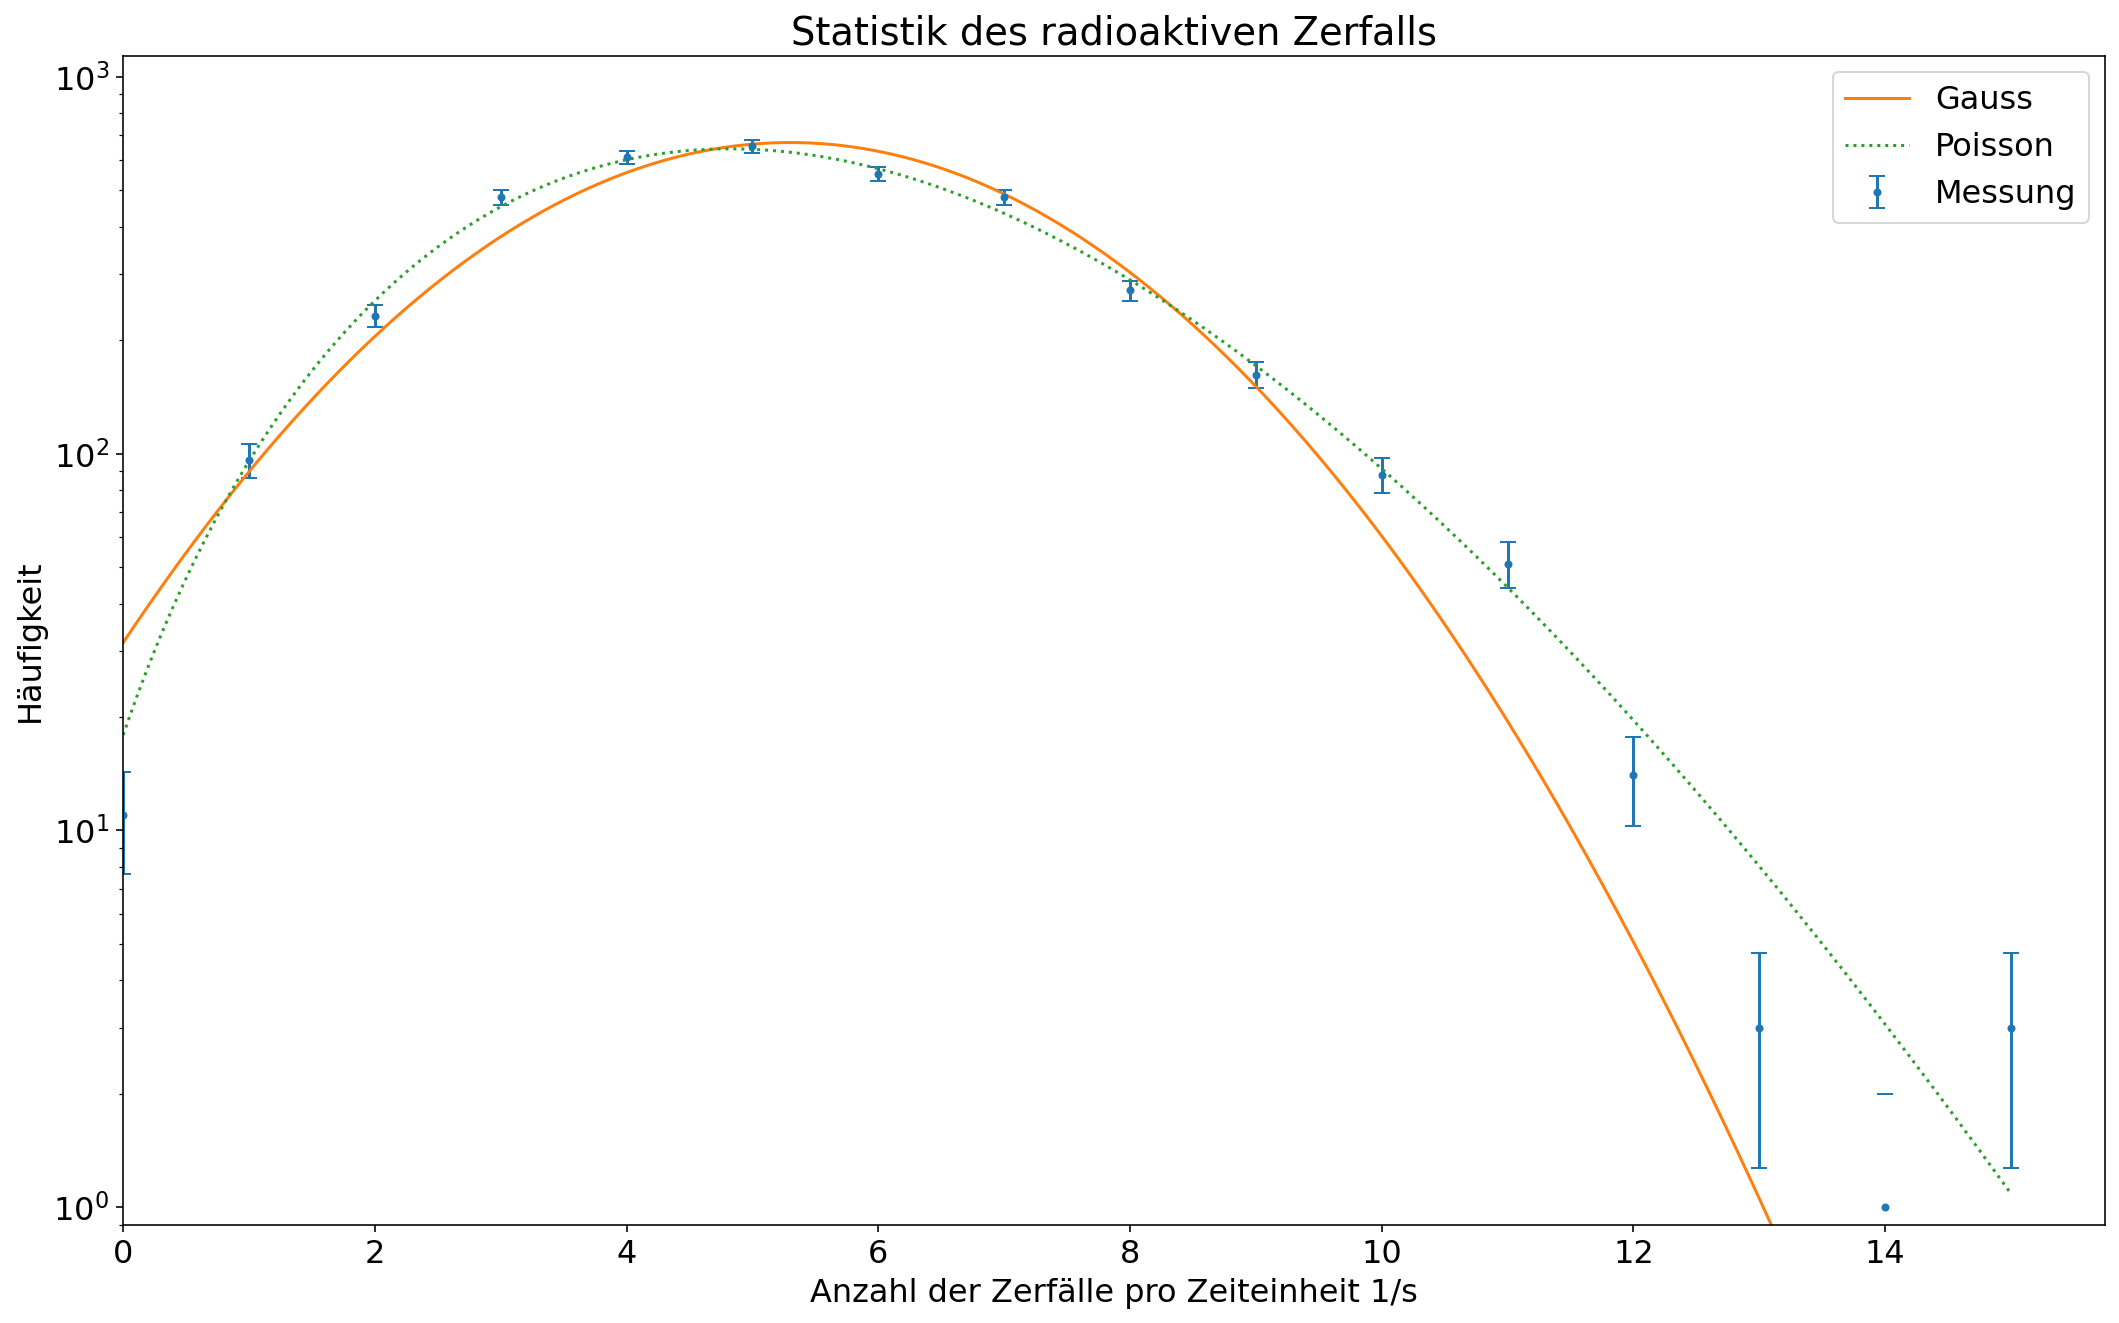

In [21]:
# initiate figure
if mpl.get_backend() == 'pgf':
    plt.clf()
    plt.figure(figsize=(default_width, default_width*default_ratio))

# plots
plt.errorbar(anzahl,haeufigkeit, linestyle='none', marker='.', yerr=haeufigkeit_err, label='Messung')
x = np.linspace(np.min(anzahl), np.max(anzahl),1000)
plt.plot(x, gaussian(x, *popt_g), label='Gauss')
plt.plot(x, poisson(x, *popt_p), label='Poisson', linestyle=':')

# options
plt.xlabel('Anzahl der Zerfälle pro Zeiteinheit 1/s')
plt.ylabel('Häufigkeit')
plt.title('Statistik des radioaktiven Zerfalls')
plt.yscale('log', nonposy='mask') # set y scale to logarithmic
plt.xlim(left=0)
plt.ylim(bottom=np.min(haeufigkeit)*0.9)
plt.legend()

# save and show
filename='verteilung_kleine_mittlere_verteilungszahl'
if mpl.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+filename+'.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+filename+'.pdf', format='pdf')
    plt.clf()
else:
    plt.savefig(FIGURE_PATH+filename+'.jpg', format='jpg')
plt.show()

#### Güte des Fits $\chi^2$

In [22]:
# Gauss:
chi2_g=np.sum((gaussian(anzahl[:-3],*popt_g) - haeufigkeit[:-3])**2 / haeufigkeit_err[:-3]**2)
dof_g=len(anzahl[:-3])-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g=chi2_g/dof_g
print("chi2_g=", chi2_g)
print("chi2_red_g=",chi2_red_g)

# Poisson:
chi2_p=np.sum((poisson(anzahl[:-3],*popt_p) - haeufigkeit[:-3])**2 / haeufigkeit_err[:-3]**2)
dof_p=len(anzahl[:-3])-2 #poisson hat nur 2 Pa
chi2_red_p=chi2_p/dof_p
print("chi2_p=", chi2_p)
print("chi2_red_p=",chi2_red_p)

chi2_g= 119.1857001457844
chi2_red_g= 11.918570014578439
chi2_p= 18.175834701231423
chi2_red_p= 1.6523486092028568


In [23]:
# Gauss:
prob_g = round(1-chi2.cdf(chi2_g,dof_g),2)*100
# Poisson:
prob_p = round(1-chi2.cdf(chi2_p,dof_p),2)*100

print(f'Wahrscheinlichkeit Gauss   = {prob_g}%')
print(f'Wahrscheinlichkeit Poisson = {prob_p}%')

Wahrscheinlichkeit Gauss   = 0.0%
Wahrscheinlichkeit Poisson = 8.0%
